In [1]:
import csv
import numpy as np 
import random

In [2]:
def loadDataSet(filename,split,trainingSet=[],testSet=[]):
    with open(filename, newline='') as csvfile:
        lines=csv.reader(csvfile)
        dataset = list(lines)
        print(dataset)    
        print(len(dataset))
        dataset=np.random.permutation(dataset)#打亂資料
        for x in range(len(dataset)):
            for y in range(4):
                print(x,y,dataset[x][y])
                dataset[x][y]=float(dataset[x][y])
            if x/(len(dataset)) < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])  
                    
    print("Train:",trainingSet,repr(len(trainingSet)))
    print("Test:",testSet,repr(len(testSet)))

In [32]:
# 畫圖 
import matplotlib.pyplot as plt

def Draw(Dataset):  
    
    x = Dataset[0]  # we only take the first two features.
    y = Dataset[1]
    plt.figure(figsize=(12, 8))
    plt.scatter(x, y, alpha=0.6) 
    plt.show()


[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'], ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'], ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa']]
4
0 0 4.6
0 1 3.1
0 2 1.5
0 3 0.2
1 0 5.1
1 1 3.5
1 2 1.4
1 3 0.2
2 0 4.9
2 1 3.0
2 2 1.4
2 3 0.2
3 0 4.7
3 1 3.2
3 2 1.3
3 3 0.2
Train: [array(['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'], dtype='<U11'), array(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='<U11')] 2
Test: [array(['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'], dtype='<U11'), array(['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'], dtype='<U11')] 2


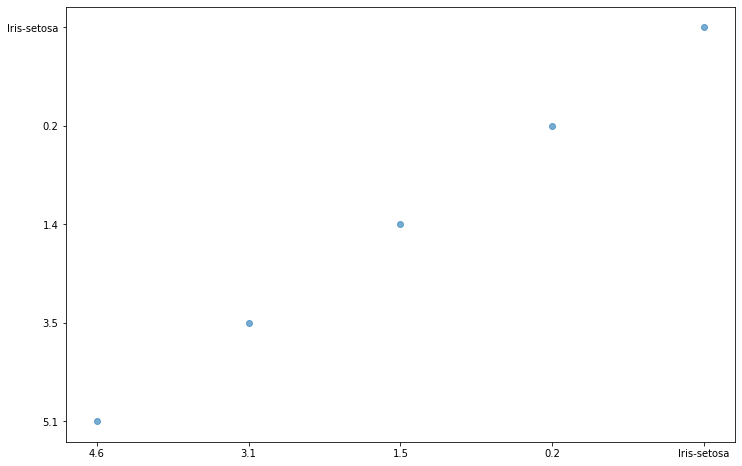

In [33]:
dataset='iris1.data.txt'
trainingSet=[]
testSet=[]
split=0.5 
loadDataSet(dataset,split,trainingSet,testSet)
Draw((trainingSet))

SyntaxError: unexpected EOF while parsing (<ipython-input-15-bb97e5b87d4b>, line 6)

In [4]:
import math
def EuclideanDis(d1,d2,length):
    dis=0
    for x in range(length):
        dis+=pow((d1[x]-d2[x]),2)
    return math.sqrt(dis)

In [5]:
test1=[2,2,2,'a']
test2=[4,2,4,'b']
dis=EuclideanDis(test1,test2,2)
print("Dis=",repr(dis))

Dis= 2.0


In [6]:
import operator
def getNeighbors(trainingSet, testInstance, k):
    disSet=[]
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist= EuclideanDis(testInstance,trainingSet[x],length)
        disSet.append((trainingSet[x],dist))
        disSet.sort(key=operator.itemgetter(1)) #用第二個域'距離'來由小到大排
        neighbors = []
    for x in range(k):
        neighbors.append(disSet[x][0])
    #print(disSet)
    return neighbors

In [7]:
#test
testTrainSet=[[2,2,2,'a'],[4,4,4,'b'],[1,1,1,'c'],[4.5,4,4,'b']]
test=[5,5,5]
testNeighbors=getNeighbors(testTrainSet,test,3)
print(testNeighbors)

[[4.5, 4, 4, 'b'], [4, 4, 4, 'b'], [2, 2, 2, 'a']]


In [8]:
import operator
def getResponse(neighbors):
    classVotes={}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] +=1
        else:
            classVotes[response] =1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1),reverse=True)
    return sortedVotes[0][0]

In [9]:
#test
print(getResponse(testNeighbors))

b


In [10]:
def getAccuracy(testSet,predittions):
    correct =0
    for x in range (len(testSet)):
        if testSet[x][-1] is predittions[x]:
            correct +=1
    return (correct/float(len(testSet)))*100.0

In [11]:
#test
predittions=['a','b','b','b']
accuracy=getAccuracy(testTrainSet,predittions)
print(accuracy)

75.0


In [12]:
def main():
    dataset='iris.data'
    trainingSet=[]
    testSet=[]
    split=0.5 
    loadDataSet(dataset,split,trainingSet,testSet)
    #print(trainingSet)
    predittions=[]
    k=int(input("k="))
    for x in range(len(testSet)):
            neighbors= getNeighbors(trainingSet,testSet[x],k)
            result = getResponse(neighbors)
            predittions.append(result)
            print("predict=",result,"real=",testSet[x][-1])
    accuracy = getAccuracy(testSet,predittions)
    print("accuracy=",accuracy,"%")       

In [13]:
main()

[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'], ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'], ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'], ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'], ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'], ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'], ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'], ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'], ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'], ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'], ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'], ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'], ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'], ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'], ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'], ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'], ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'], ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'], ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'], ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa'], ['5.1', '3.7', '1.5', '0.4', 'Iris-setosa'], ['4.6', '

IndexError: list index out of range